In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib widget

# Load style
plt.style.use('PlotStyle.mplstyle')
import matplotlib.colors as colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

from datetime import datetime
from tqdm import tqdm

import os

# Load functions
import sys
sys.path.append("../../ExcessMortality")
import ExcessMortalityFunctions as emf
# import AdditionalFunctions as ps


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)

saveFigures = True
saveFigures = False
print('saveFigures is set to: '+str(saveFigures))
print('Done loading packages')

saveFigures is set to: False
Done loading packages


In [38]:
# Set paths
pathData = '../Data/'
pathResults = '../Data/AnalysisResults'
pathFigs = '../Figures/'

In [39]:
# Flags and analysis parameters used in main analysis, set here to load correct results
numYears = 12 # Number of years on both sides of date to use for baseline calculations 
numYearsTot = (numYears*2) # The "name" of the baseline (i.e. +/- 5 years is a 10-year baseline, +/- 12 is a 24 year baseline)
thresholdExcess = 3 # Threshold (in terms of Z-scores) for identifying a day as having increased excess

# # Determine directory in which results was saved
# pathResultsUpper = pathResults + f'_Years{numYears}_Threshold{thresholdExcess}/'

# Additional parameters used
thresholdLower = 2 # Lower threshold used for determining the start and end of periods (in terms of Z-scores)
# maxDaysBelowThreshold = 4 # Number of days below thresholdLower before a period of excess is "stopped"
# minimumLengthOfEpidemic = 4 # Minimal number of days above thresholdExcess which is counted as a period of excess 
maxDaysBelowThreshold = 7 # Number of days below thresholdLower before a period of excess is "stopped"
minimumLengthOfEpidemic = 0 # Minimal number of days above thresholdExcess which is counted as a period of excess 
excessCountThreshold = 50 # Only save mortality crises with more than this number of excess deaths

# Various tests for sensitivity
# numYears = 6 # Number of years on both sides of date to use for baseline calculations 
# maxDaysBelowThreshold = 7 # Number of days below thresholdLower before a period of excess is "stopped"
# excessCountThreshold = 20 # Only save mortality crises with more than this number of excess deaths


# Determine filename to use for final results
# finalResultsFilename = 'AllCrises'+f'_Years{numYears}_Threshold{thresholdExcess}_LowerThreshold{thresholdLower}_MaxDaysBelow{maxDaysBelowThreshold}_minLength{minimumLengthOfEpidemic}_minCount{excessCountThreshold}'
finalResultsFilename = 'AllCrises'+f'_NonSmoothed_Years{numYears}_Threshold{thresholdExcess}_LowerThreshold{thresholdLower}_MaxDaysBelow{maxDaysBelowThreshold}_minLength{minimumLengthOfEpidemic}_minCount{excessCountThreshold}'
# finalResultsFilename = finalResultsFilename +'_Clustered'
finalResultsFilename = finalResultsFilename +'_Clustered_Grouped'
finalResultsFilename 

'AllCrises_NonSmoothed_Years12_Threshold3_LowerThreshold2_MaxDaysBelow7_minLength0_minCount50_Clustered_Grouped'

In [40]:
# Load the table of results
dfCrises = pd.read_csv(pathData + finalResultsFilename + '.csv')
dfCrises['Start'] = pd.to_datetime(dfCrises['Start'])
dfCrises['End'] = pd.to_datetime(dfCrises['End'])
# dfCrises['DayWithMostBurials'] = pd.to_datetime(dfCrises['DayWithMostBurials'])
dfCrises['DayWithMostDeaths'] = pd.to_datetime(dfCrises['DayWithMostDeaths'])

# Make main overview figure

In [41]:
import matplotlib.cm as cm
# Sort clusters (and name)

numClusters = len(dfCrises.Cluster.unique())
cmap = cm.get_cmap('jet',numClusters)
cmapBar = cm.get_cmap('rainbow')


C:\Users\rakrpe\AppData\Local\Temp\ipykernel_28556\3881813297.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet',numClusters)
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_28556\3881813297.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmapBar = cm.get_cmap('rainbow')


In [42]:
curClusters = np.arange(numClusters)
clusterNameDict = dict(zip(curClusters,[chr(65+x) for x in curClusters])) # chr(65) is 'A', chr(66) is 'B' ...

invMap = {v: k for k, v in clusterNameDict.items()}

In [43]:
# Hand-picked order:
allAmts = [
'Staden København', 
'Københavns Amt',
'Frederiksborg Amt', 
'Holbæk Amt',
'Sorø Amt', 
'Præstø Amt', 
'Maribo Amt', 
'Bornholms Amt', 
'Odense Amt', 
'Svendborg Amt', 
'Hjørring Amt',
'Thisted Amt', 
'Ålborg Amt', 
'Viborg Amt',
'Ringkøbing Amt', 
'Ribe Amt',
'Randers Amt', 
'Skanderborg Amt', 
'Århus Amt', 
'Vejle Amt',
'Sønderborg Amt', 
'Haderslev Amt', 
'Åbenrå Amt', 
'Nordborg Amt',
'Tønder Amt',
]

In [44]:
curAmt = allAmts[3]
curAmt

curdf = dfCrises[dfCrises.Amt == curAmt]
curdf.head()

,Amt,Start,End,NumberOfDays,DayWithMostDeaths,Excess,ExcessPct,GenderRatio,TimeOfYear,Season,PopulationEstimate,Exc_Infants_stillborn,Exc_1-14,Exc_15-39,Exc_40-59,Exc_60+,Pct_Infants_stillborn,Pct_1-14,Pct_15-39,Pct_40-59,Pct_60+,DataSum_Infants_stillborn,DataSum_1-14,DataSum_15-39,DataSum_40-59,DataSum_60+,Baseline_Infants_stillborn,Baseline_1-14,Baseline_15-39,Baseline_40-59,Baseline_60+,FracAll_Infants_stillborn,FracAll_1-14,FracAll_15-39,FracAll_40-59,FracAll_60+,AgeSplitSumExc,Cluster,ClusterA_Prob,ClusterB_Prob,ClusterC_Prob,ClusterD_Prob,ClusterE_Prob,ClusterF_Prob,Group
4,Holbæk Amt,1831-08-02,1832-02-06,188,1831-08-26,1217,209.0,0.528365,Q3,Summer,62597.0,113.847207,79.037101,156.464455,351.070044,550.269168,134.0,94.0,225.0,481.0,360.0,199.0,163.0,226.0,424.0,703.0,85.152793,83.962899,69.535545,72.929956,152.730832,0.091028,0.063195,0.125103,0.280702,0.439973,1250.687976,E,0.0000,0.9980,0.0,0.0009,0.0003,0.0008,Harvest-epidemics
10,Holbæk Amt,1829-07-11,1829-12-18,160,1829-08-28,590,136.0,0.523902,Q3,Summer,61540.0,17.302824,129.020477,55.575867,171.460993,241.724207,27.0,223.0,102.0,298.0,215.0,81.0,187.0,110.0,229.0,354.0,63.697176,57.979523,54.424133,57.539007,112.275793,0.028131,0.209761,0.090355,0.278760,0.392994,615.084368,E,0.0000,0.9788,0.0,0.0024,0.0181,0.0007,Harvest-epidemics
24,Holbæk Amt,1828-08-04,1828-10-22,79,1828-08-14,409,193.0,0.574879,Q3,Summer,60996.0,3.610093,26.533489,59.541351,130.070976,199.701517,12.0,104.0,225.0,407.0,368.0,34.0,52.0,86.0,162.0,254.0,30.389907,25.466511,26.458649,31.929024,54.298483,0.008607,0.063257,0.141948,0.310093,0.476095,419.457426,E,0.0000,0.9987,0.0,0.0004,0.0000,0.0009,Harvest-epidemics
30,Holbæk Amt,1829-02-27,1829-05-25,87,1829-03-08,362,95.0,0.498656,Q1,Spring,61291.0,38.713298,204.578251,29.291869,34.976647,83.065100,68.0,264.0,69.0,73.0,87.0,96.0,282.0,72.0,83.0,179.0,57.286702,77.421748,42.708131,48.023353,95.934900,0.099106,0.523720,0.074987,0.089540,0.212647,390.625165,B,0.8944,0.0000,0.0,0.0000,0.1056,0.0000,Child mortality 1829
35,Holbæk Amt,1891-11-22,1892-02-03,73,1892-01-11,327,103.0,0.462733,Q1,Winter,94975.0,21.999741,78.388128,11.751873,46.563783,192.445723,43.0,184.0,43.0,131.0,147.0,73.0,121.0,39.0,82.0,323.0,51.000259,42.611872,27.248127,35.436217,130.554277,0.062651,0.223233,0.033467,0.132604,0.548045,351.149247,F,0.0000,0.0016,0.0,0.9962,0.0023,0.0000,Pandemic Flu (1891/1892)


In [45]:
allAmtsNames = [x.replace(' Amt','').replace('Bornholms','Bornholm') for x in allAmts]
allAmtsNames[0] = 'Copenhagen, city'
allAmtsNames[1] = 'Copenhagen, county'

In [48]:
# # %matplotlib inline
# # %matplotlib widget

# # dfCrises[dfCrises.Amt.str.contains('Staden')]
# def sizeScaler(exc):
#     return 5*np.log(exc/50 + 4) 

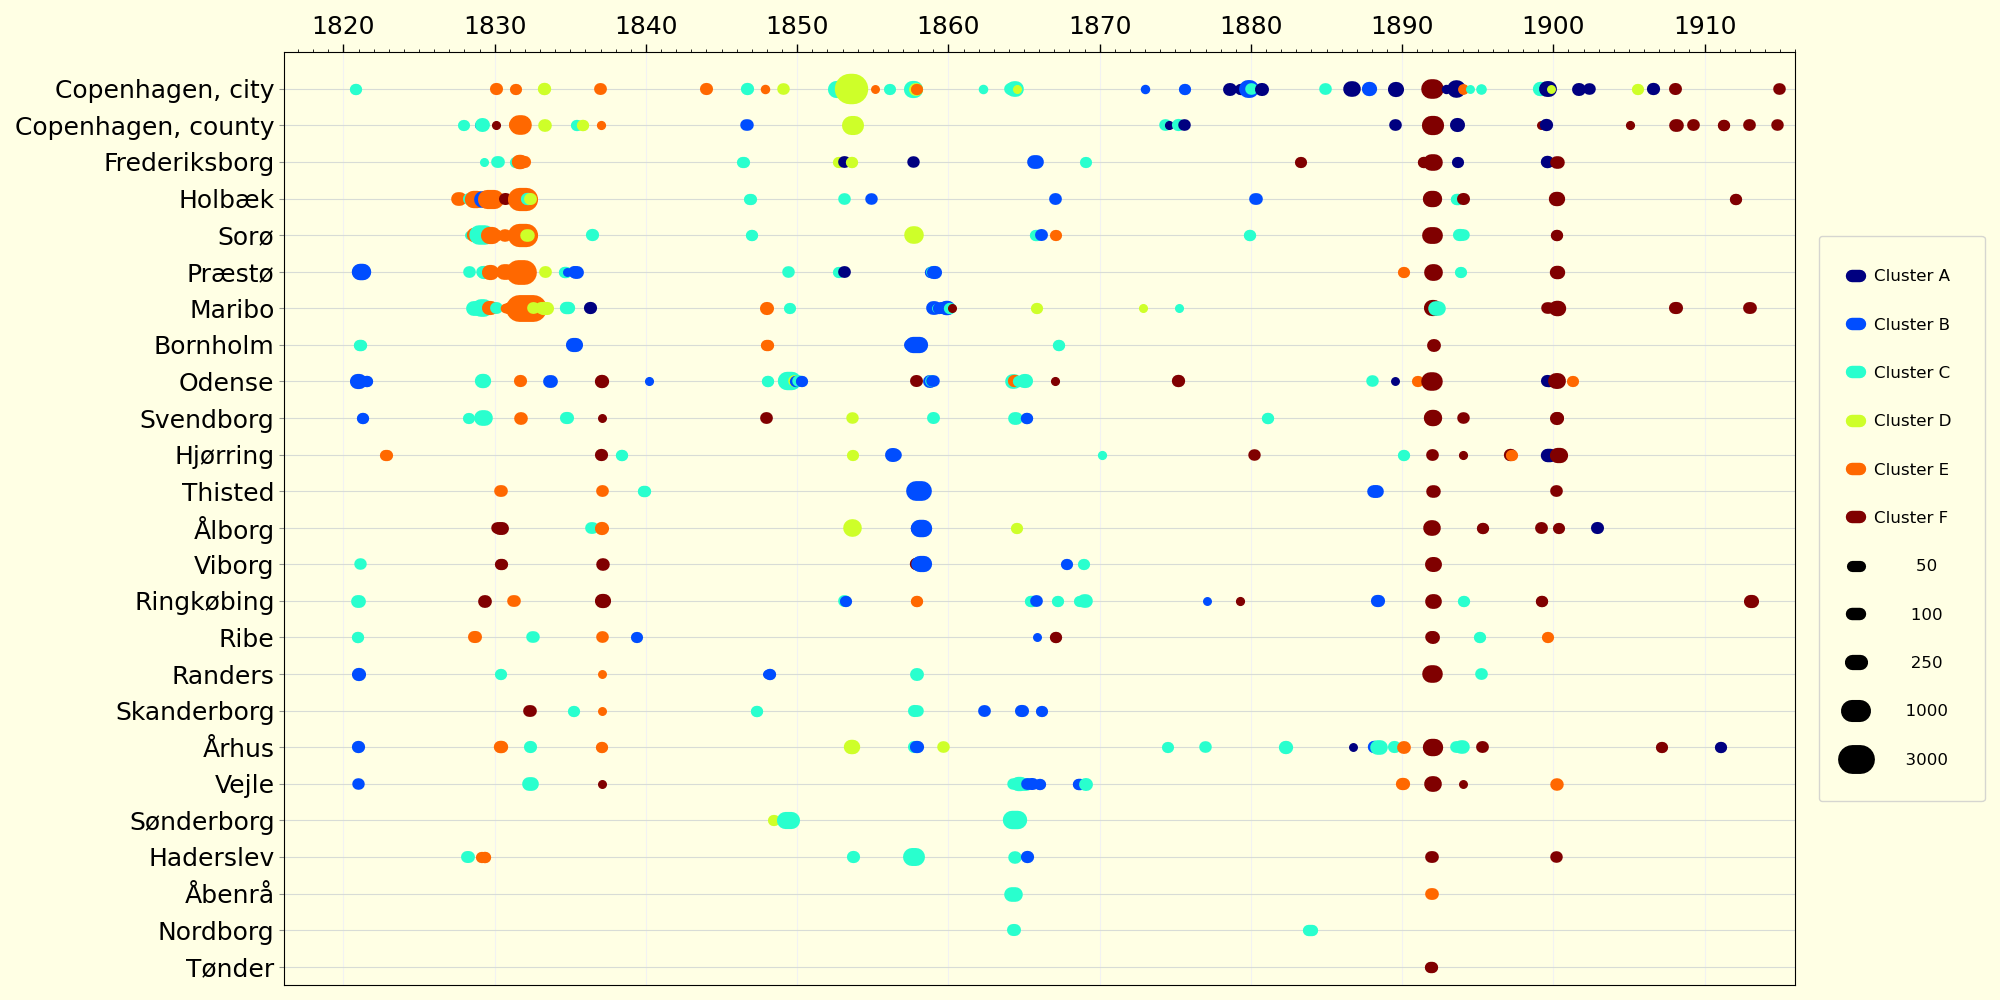

In [103]:
def sizeScaler(exc):
    return 5*np.log(exc/50 + 4) 
    # return 3*np.sqrt(exc/50-0.4) 

fig,ax = plt.subplots(figsize=(20,10))


# for amtNum,curAmt in enumerate(allAmts[:5]):
# for amtNum,curAmt in enumerate(allAmts):
for amtNum,curAmt in enumerate(allAmts[::-1]):
    curdf = dfCrises[dfCrises.Amt == curAmt].sort_values('Start')
    for i,r in curdf.iterrows():

        # curSize = 10
        # curSize = 2*np.log(r.Excess)
        # curSize = 5*np.log(r.Excess/50 + 4) 
        curSize = sizeScaler(r.Excess)

        curHeight = i
        curHeight = amtNum

        curColor = cmap(invMap[r.Cluster]/numClusters)

        ax.plot(r.DayWithMostDeaths,curHeight,'o',ms=curSize/1.5,color=curColor) # Plot a small circle as well, since matplotlib sometimes hides lines that are too small, resulting in things appearing and disappearing dependent on zoom-level and figure-size
        ax.plot([r.Start,r.End],[curHeight,curHeight],color=curColor,lw=curSize, solid_capstyle='round')

ax.set_yticks(np.arange(len(allAmts)))
ax.set_ylim([-0.5,len(allAmts)])
# ax.set_yticklabels(allAmts)
# ax.set_yticklabels(allAmts[::-1])
ax.set_yticklabels(allAmtsNames[::-1])

ax.xaxis.tick_top()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True) 
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# ax.set_xticks(np.arange(
#     np.datetime64('1810'),
#     np.datetime64('1921'),
#     np.timedelta64(10,'Y')
# ))

ax.tick_params(axis='x',width=1, length=6)
ax.tick_params(axis='y',color='xkcd:grey')

import matplotlib.dates as mdates 
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

ax.set_xlim(right=np.datetime64('1916'))



curExc = 100
curSize = sizeScaler(curExc)
for i in range(numClusters):
    
    curColor = cmap(i/numClusters)
    curLabel = 'Cluster '+clusterNameDict[i]
    ax.plot([20,20],[30,30],color=curColor,lw=curSize, solid_capstyle='round',label=curLabel)

curExc = 50
curSize = sizeScaler(curExc)
ax.plot([20,20],[30,30],color='k',lw=curSize, solid_capstyle='round',label=f'{curExc:10.0f}')
curExc = 100
curSize = sizeScaler(curExc)
ax.plot([20,20],[30,30],color='k',lw=curSize, solid_capstyle='round',label=f'{curExc:10.0f}')
curExc = 250
curSize = sizeScaler(curExc)
ax.plot([20,20],[30,30],color='k',lw=curSize, solid_capstyle='round',label=f'{curExc:10.0f}')
curExc = 1000
curSize = sizeScaler(curExc)
ax.plot([20,20],[30,30],color='k',lw=curSize, solid_capstyle='round',label=f'{curExc:10.0f}')
curExc = 3000
curSize = sizeScaler(curExc)
ax.plot([20,20],[30,30],color='k',lw=curSize, solid_capstyle='round',label=f'{curExc:10.0f}')


ax.legend(bbox_to_anchor=(1.01,0.5),loc='center left',handlelength=0.5,labelspacing=2,fontsize=12,borderpad=2)

ax.grid(True,axis='y',color='xkcd:light grey')
ax.grid(True,axis='x',color=(0.95,0.95,0.95,0.6))

fig.tight_layout()

if saveFigures:
    fig.savefig(pathFigs+'OverviewOfCrises')

# Tests

In [104]:
# fig,ax = plt.subplots(figsize=(15,2))
# curAmt = 'Staden København'
# amtNum = 0
# curdf = dfCrises[dfCrises.Amt == curAmt].sort_values('Start')
# for i,r in curdf.iterrows():

#     # curSize = 10
#     # curSize = 2*np.log(r.Excess)
#     # curSize = 5*np.log(r.Excess/50 + 4) 
#     curSize = sizeScaler(r.Excess) 

#     curHeight = i
#     curHeight = amtNum

#     curColor = cmap(invMap[r.Cluster]/numClusters)

#     # ax.plot(r.DayWithMostDeaths,curHeight,'o',ms=curSize/1.2,color='k') 
#     ax.plot(r.DayWithMostDeaths,curHeight,'o',ms=curSize/1.5,color=curColor)
#     ax.plot([r.Start,r.End],[curHeight,curHeight],color=curColor,lw=curSize, solid_capstyle='round')



# ax.set_xlim(left=np.datetime64('1816'))
# ax.set_xlim(right=np.datetime64('1916'))
# ax.grid(True,axis='x')

# fig,ax = plt.subplots(figsize=(15,2))
# curAmt = 'Staden København'
# amtNum = 0
# curdf = dfCrises[dfCrises.Amt == curAmt].sort_values('Start')
# for i,r in curdf.iterrows():

#     # curSize = 10
#     # curSize = 2*np.log(r.Excess)
#     # curSize = 5*np.log(r.Excess/50 + 4) 
#     curSize = sizeScaler(r.Excess) 

#     curHeight = i
#     curHeight = amtNum

#     curColor = cmap(invMap[r.Cluster]/numClusters)

#     # ax.plot(r.DayWithMostDeaths,curHeight,'o',ms=curSize/1.2,color='k') 
#     ax.plot([r.Start,r.End],[curHeight,curHeight],color=curColor,lw=curSize, solid_capstyle='round')
#     # ax.plot(r.DayWithMostDeaths,curHeight,'o',ms=curSize,color=curColor)

# ax.grid(True,axis='x')

In [14]:
# # Test of scaling
# def sizeScaler(exc):
#     return 5*np.log(exc/50 + 4) 
#     # return 3*np.sqrt(exc/50-0.4) 

# fig,ax = plt.subplots()

# valsToCheck = [50,100,200,500,1000,2000]
# for i,va in enumerate(valsToCheck):
#     # curWi = 4*np.log(va/50 + 1) 
    
#     curSize = 5*np.log(va/50 + 4) 
#     curSize = 4*np.sqrt(va/50 -0.2) 

#     ax.plot([1,10],[i,i],lw=curSize)